In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import os
cwd = os.getcwd()
main_dir = os.path.dirname(cwd)

In [3]:
#------------------------------- READ SK DATA INTO PANDAS DF ---------------------------------------------#
## MULTIRING nue/nuebar
df_multiring_nue = pd.read_csv(main_dir+'\datafiles\SK_data\multiring_multigev_nue.csv',names=['cos','nev'] )
df_multiring_nue_pred = pd.read_csv(main_dir+'\datafiles\SK_data\multiring_multigev_nue_prediction.csv',names=['cos','nev'] )
df_multiring_nue['difference'] = ( df_multiring_nue.nev - df_multiring_nue_pred.nev)/ df_multiring_nue_pred.nev

df_multiring_nuebar = pd.read_csv(main_dir+'\datafiles\SK_data\multiring_multigev_nuebar.csv',names=['cos','nev'] )
df_multiring_nuebar_pred = pd.read_csv(main_dir+'\datafiles\SK_data\multiring_multigev_nuebar_prediction.csv',names=['cos','nev'] )
df_multiring_nuebar['difference'] = ( df_multiring_nuebar.nev - df_multiring_nuebar_pred.nev)/ df_multiring_nuebar_pred.nev

## SINGLERING nue/nuebar
df_singlering_nue = pd.read_csv(main_dir+'\datafiles\SK_data\singlering_multigev_nue.csv',names=['cos','nev'] )
df_singlering_nue_pred = pd.read_csv(main_dir+'\datafiles\SK_data\singlering_multigev_nue_prediction.csv',names=['cos','nev'] )
df_singlering_nue['difference'] = ( df_singlering_nue.nev - df_singlering_nue_pred.nev)/ df_singlering_nue_pred.nev

df_singlering_nuebar = pd.read_csv(main_dir+'\datafiles\SK_data\singlering_multigev_nuebar.csv',names=['cos','nev'] )
df_singlering_nuebar_pred = pd.read_csv(main_dir+'\datafiles\SK_data\singlering_multigev_nuebar_prediction.csv',names=['cos','nev'] )
df_singlering_nuebar['difference'] = ( df_singlering_nuebar.nev - df_singlering_nuebar_pred.nev)/ df_singlering_nuebar_pred.nev


#--------------------- Preparing Data for plots -----------------------------#
list_titles = ['Multi-Ring e-like $\\nu_e$','Multi-Ring e-like $\\bar{\\nu}_e$', 'Multi-GeV e-like $\\nu_e$','Multi-GeV e-like $\\bar{\\nu}_e$']
list_data = [df_multiring_nue, df_multiring_nuebar, df_singlering_nue, df_singlering_nuebar]
list_pred = [df_multiring_nue_pred, df_multiring_nuebar_pred, df_singlering_nue_pred, df_singlering_nuebar_pred]

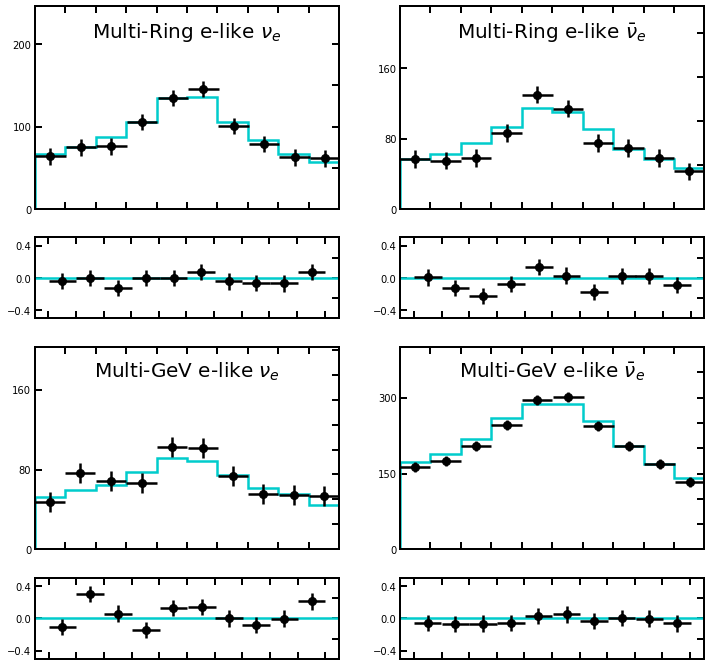

In [4]:
#--------------------- MULTIRING/SINGLERING nue/nue_bar PLOTS -------------------------------#
fig, ax = plt.subplots( nrows = 4,
                        ncols = 2,
                        figsize=(12,12),
                        gridspec_kw = {'height_ratios':[2.5,1.0,2.5,1.0]})

j=k=0
for i, item in enumerate(zip(list_data,list_pred,list_titles)):
    #-------------------------------------------------#
    if i%2 == 0 and i!=0:
        k += 2
        j = 0
    #-------------------------------------------------#
    data = item[0]
    pred = item[1]
    title = item[2]
    #-------------------------------------------------#
    # TOP: DATA (points) vs PREDICTION (histogram)
    errory=10.
    errorx=0.1
    bins = [round(i,2) for i in np.arange(-1,1.2,0.2)]
    ax[k,j].hist(bins[:-1], bins=bins[:], weights=pred.nev, histtype='step', color='#00cccc', linewidth=2.5)
    ax[k,j].scatter(data.cos,data.nev,  color='k')
    ax[k,j].errorbar(data.cos,data.nev,errory, errorx, "o", markersize=8, color = "k", linewidth=2.5, zorder=3)
    ax[k,j].set_xlim(-1,1)
    ax[k,j].set_ylim(0,data.nev.max()+100)
    ax[k,j].set_xticks(bins)
    
    # BOTTOM: percentual difference between PRED/DATA    
    ax[k+1,j].axhline(0,color='#00cccc', linewidth=2.5)
    ax[k+1,j].scatter(data.cos, data.difference, color = "k",  zorder=3)
    ax[k+1,j].errorbar(data.cos, data.difference, 0.1, errorx, "o", markersize=8, color = "k", linewidth=2.5, zorder=3)
    ax[k+1,j].set_xticks(bins)
    ax[k+1,j].set_ylim(-0.5,0.5)
    
    #------------------ Plot Style ------------------#
    # top plot
    ax[k,j].text( 0.5,0.85, title, fontsize=20,
                horizontalalignment='center',
                transform=ax[k,j].transAxes)
    
    ax[k,j].xaxis.set_tick_params(direction='in', length=7, width=2)
    ax[k,j].yaxis.set_tick_params(direction='in', length=7, width=2)
    ax[k,j].set_xticklabels([])
    ax[k,j].yaxis.set_major_locator(plt.MaxNLocator(3))

    secax = ax[k,j].secondary_xaxis('top') 
    secax.set_xticks(bins)
    secax.set_xticklabels([])
    secay = ax[k,j].secondary_yaxis('right')
    secay.set_yticklabels([])
    secax.xaxis.set_tick_params(direction='in',length=7,width=2)
    secay.yaxis.set_tick_params(direction='in',length=7,width=2)

    ax[k,j].spines['bottom'].set_color('0')
    ax[k,j].spines["bottom"].set_linewidth(2)
    ax[k,j].spines['top'].set_color('0')
    ax[k,j].spines["top"].set_linewidth(2)
    ax[k,j].spines['right'].set_color('0')
    ax[k,j].spines["right"].set_linewidth(2)
    ax[k,j].spines['left'].set_color('0')
    ax[k,j].spines["left"].set_linewidth(2)
    
    # bottom plot
    ax[k+1,j].xaxis.set_tick_params(direction='in', length=7, width=2)
    ax[k+1,j].yaxis.set_tick_params(direction='in', length=7, width=2)
    ax[k+1,j].set_xticklabels([])
    ax[k+1,j].yaxis.set_major_locator(plt.MaxNLocator(3))
    
    secax = ax[k+1,j].secondary_xaxis('top')
    secax.set_xticks(bins)
    secax.set_xticklabels([])
    secay = ax[k+1,j].secondary_yaxis('right')
    secay.set_yticklabels([])
    secax.xaxis.set_tick_params(direction='in',length=7,width=2)
    secay.yaxis.set_tick_params(direction='in',length=7,width=2)

    ax[k+1,j].spines['bottom'].set_color('0')
    ax[k+1,j].spines["bottom"].set_linewidth(2)
    ax[k+1,j].spines['top'].set_color('0')
    ax[k+1,j].spines["top"].set_linewidth(2)
    ax[k+1,j].spines['right'].set_color('0')
    ax[k+1,j].spines["right"].set_linewidth(2)
    ax[k+1,j].spines['left'].set_color('0')
    ax[k+1,j].spines["left"].set_linewidth(2)

    j+=1
    


In [77]:
#------------------------------- READ SIGNAL NEVENTS INTO PANDAS DF ---------------------------------------------#
df_sgn = pd.read_csv('Events_LN_from_K_msf_1000_mass_coupling.csv')
df_sgn = pd.read_csv(main_dir +'/datafiles/EventDistribution/NEVENTS_BM1.csv', index_col=0)
df_sgn = df_sgn.reset_index(drop=True)
print( df_sgn.lam121.unique())
print()
print( df_sgn.m.unique())



[1.00000000e-03 1.62377674e-03 2.63665090e-03 4.28133240e-03
 6.95192796e-03 1.12883789e-02 1.83298071e-02 2.97635144e-02
 4.83293024e-02 7.84759970e-02 1.27427499e-01 2.06913808e-01
 3.35981829e-01 5.45559478e-01 8.85866790e-01 1.43844989e+00
 2.33572147e+00 3.79269019e+00 6.15848211e+00 1.00000000e+01]

[0.5  0.53 0.55 0.58 0.61 0.63 0.66 0.68 0.71 0.74 0.76 0.79 0.82 0.84
 0.87 0.89 0.92 0.95 0.97 1.  ]


m: 0.53 	 lambda: 0.3359818286283781


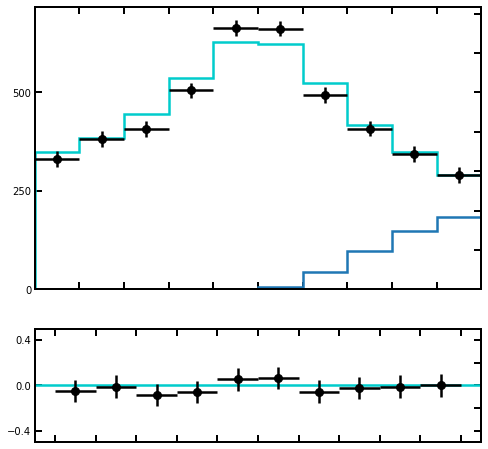

In [85]:
bins = [round(i,2) for i in np.arange(-1,1.2,0.2)]
bin_center = [bin_ + 0.1 for bin_ in bins]


df_merged_pred = pd.concat( list_pred ).reset_index()
df_merged_pred['bin'] = pd.cut(df_merged_pred.cos, bins=bins,  include_lowest=True)    
pred_per_bin = df_merged_pred.groupby('bin').nev.sum().values

df_merged_data = pd.concat( list_data ).reset_index()
df_merged_data['bin'] = pd.cut(df_merged_data.cos, bins=bins,  include_lowest=True)    
data_per_bin = df_merged_data.groupby('bin').nev.sum().values

difference = ( data_per_bin -pred_per_bin)/ pred_per_bin

#--------------------------------------------------PLOT-----------------------------------------------#
fig, ax =  plt.subplots( 2,1,figsize=(8,8),
                         gridspec_kw = {'height_ratios':[2.5,1.0]})
         
# TOP:
errory=20.0
errorx=0.1
ax[0].hist(df_merged_pred.cos, bins=bins[:], weights=df_merged_pred.nev, histtype='step', color='#00cccc', linewidth=2.5)
ax[0].scatter(bin_center[:-1], data_per_bin,color='k')
ax[0].errorbar(bin_center[:-1],data_per_bin, errory, errorx, "o", markersize=8, color = "k", linewidth=2.5, zorder=3)

ax[0].set_xlim(-1,1)
ax[0].set_xticks(bins)
ax[0].set_xticklabels([])
#ax[0].set_ylim(0,max(data_per_bin)+200)


# Neutralino Signal

ma_val = df_sgn.m.unique()[1]
lambda_val = df_sgn['lam121'].unique()[-8]
print(f'm: {ma_val} \t lambda: {lambda_val}')

df_sgn_filter = df_sgn[ (df_sgn['lam121'] == lambda_val) & (df_sgn['m']==ma_val)]
df_sgn_filter_events = df_sgn_filter.nev

ax[0].hist(df_sgn_filter.cos, bins=bins[:], weights= df_sgn_filter_events, histtype='step', linewidth=2.5, label= f'lam:{lambda_val}-m:{ma_val}')



# BOTTOM:    
ax[1].axhline(0,color='#00cccc', linewidth=2.5)
ax[1].scatter(bin_center[:-1], difference, color = "k",  zorder=3)
ax[1].errorbar(bin_center[:-1], difference, 0.1, errorx, "o", markersize=8, color = "k", linewidth=2.5, zorder=3)
ax[1].set_xticks(bins)
ax[1].set_ylim(-0.5,0.5)

#ax[0].legend()
#-------------------- STYLE ------------------------#
#ax[0].text( 0.5,0.9, '(Single+Multi)-Ring e-like $\\nu_e + \\bar\\nu_e$', fontsize=20,
#            horizontalalignment='center',
#            transform=ax[0].transAxes)

for i in range(2):
    ax[i].xaxis.set_tick_params(direction='in', length=7, width=2)
    ax[i].yaxis.set_tick_params(direction='in', length=7, width=2)
    ax[i].set_xticklabels([])
    ax[i].yaxis.set_major_locator(plt.MaxNLocator(3))

    secax = ax[i].secondary_xaxis('top') 
    secax.set_xticks(bins)
    secax.set_xticklabels([])
    secay = ax[i].secondary_yaxis('right')
    secay.set_yticklabels([])
    secax.xaxis.set_tick_params(direction='in',length=7,width=2)
    secay.yaxis.set_tick_params(direction='in',length=7,width=2)

    ax[i].spines['bottom'].set_color('0')
    ax[i].spines["bottom"].set_linewidth(2)
    ax[i].spines['top'].set_color('0')
    ax[i].spines["top"].set_linewidth(2)
    ax[i].spines['right'].set_color('0')
    ax[i].spines["right"].set_linewidth(2)
    ax[i].spines['left'].set_color('0')
    ax[i].spines["left"].set_linewidth(2)

In [5]:
## plot_dist(df_multiring_nue, df_multiring_nue_pred) #checked
#plot_dist(df_multiring_nuebar, df_multiring_nuebar_pred) #checked
#plot_dist(df_singlering_nue, df_singlering_nue_pred) #checked
#plot_dist(df_singlering_nuebar, df_singlering_nuebar_pred) #checked
plot_dist(df_merged_data, df_merged_pred) #checked

NameError: name 'plot_dist' is not defined